<a href="https://colab.research.google.com/github/himanshud2611/Machine-Learning/blob/main/FlipPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FlipPredict
ML Model to predict Product Category of Flipkart products.
Kaggle Dataset used: [Click Here](https://www.kaggle.com/datasets/atharvjairath/flipkart-ecommerce-dataset)

by @himanshud2611

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

2. Loading the Dataset

In [6]:
rawdataset = pd.read_csv('flipkart_com-ecommerce_sample.csv')

## Exploratory Data Analysis
We've imported libraries and loaded dataset, noe we'll move forward to Data Analysis

In [7]:
rawdataset.info()
# returns concise summary of dataframe's structure and information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [8]:
rawdataset.head(5)
#returns top(n) frames of data or sereis

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [9]:
rawdataset.shape
#returns number of rows and columns

(20002, 15)

In [10]:
rawdataset.isnull().sum()
# to check null data for dataset integrity

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

handling null-valued columns and drop them

In [50]:
columns_to_check = ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid']

# Remove rows where any of these columns have null values
dataset = rawdataset.dropna(subset=columns_to_check)

# Check how many rows were removed
rows_removed = len(rawdataset) - len(dataset)
print(f"Removed {rows_removed} rows with null values in the specified columns.")

# If you want to reset the index after removing rows
dataset = dataset.reset_index(drop=True)

# Verify that nulls have been removed from these columns
dataset.isnull().sum()

Removed 2 rows with null values in the specified columns.


uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

all the columns are enlisted so we can decide to choose which columns to use as features for our ML model

In [51]:
dataset.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

To predict the Primary Category we need 3 columns 'product_category_tree', 'product_name', and 'brand'. We need to clean the tree and create another table called 'primary_category' to extract the correct category.

## Data Cleaning

let's make a copy of original dataset first, we'll call it FKdata

In [52]:
fkdata = dataset.copy()

so we need 3 columns for now, drop the rest columns

In [53]:
fkdata.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'product_rating',
       'overall_rating', 'product_specifications'], axis=1, inplace=True)

In [54]:
fkdata

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


cleaning the 'prdouct_category_tree' column and extracting primary_category

In [55]:
def clean_prod_category():
  primary_category=[]
  #iterate in col
  for ele in fkdata['product_category_tree']:
    ele=ele.replace('"]',"") #Removes '"]' from the end of each element.
    category=ele[2:].split(" >>") # Splits the string by " >>" and takes the first element (primary category).
    primary_category.append(category[0]) #Appends this primary category to the list.

  #returinig the clean data
  return primary_category

In [56]:
#call the function
primary_category = clean_prod_category()

#check the primary category
primary_category

['Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Furniture',
 'Pet Supplies',
 'Clothing',
 'Clothing',
 'Footwear',
 'Pet Supplies',
 'Clothing',
 'Sports & Fitness',
 'Beauty and Personal Care',
 'Clothing',
 'Clothing',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing',
 'Pens & Stationery',
 'Pens & Stationery',
 'Pens & Stationery',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Bags, Wallets & Belts',
 'Clothing',
 'Footwear',
 'Home Decor & Festive Needs',
 'Automotive',
 'Tools & Hardware',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor - One Swit...',
 'Skayvon SUMMERSIBLE SINGL

In [57]:
primary_category=pd.DataFrame(primary_category,columns=["Category"])
print("Number of unique categories",len(primary_category["Category"].value_counts()))

Number of unique categories 265


In [58]:
primary_category_top=Counter(primary_category["Category"]).most_common(266)

In [59]:
fkdata

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [60]:
primary_category_top

[('Clothing', 6198),
 ('Jewellery', 3531),
 ('Footwear', 1227),
 ('Mobiles & Accessories', 1099),
 ('Automotive', 1012),
 ('Home Decor & Festive Needs', 929),
 ('Beauty and Personal Care', 710),
 ('Home Furnishing', 700),
 ('Kitchen & Dining', 647),
 ('Computers', 578),
 ('Watches', 530),
 ('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gol

## Data Visualization

<ipython-input-61-17290efc77f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category",data=primary_category,palette="rainbow",


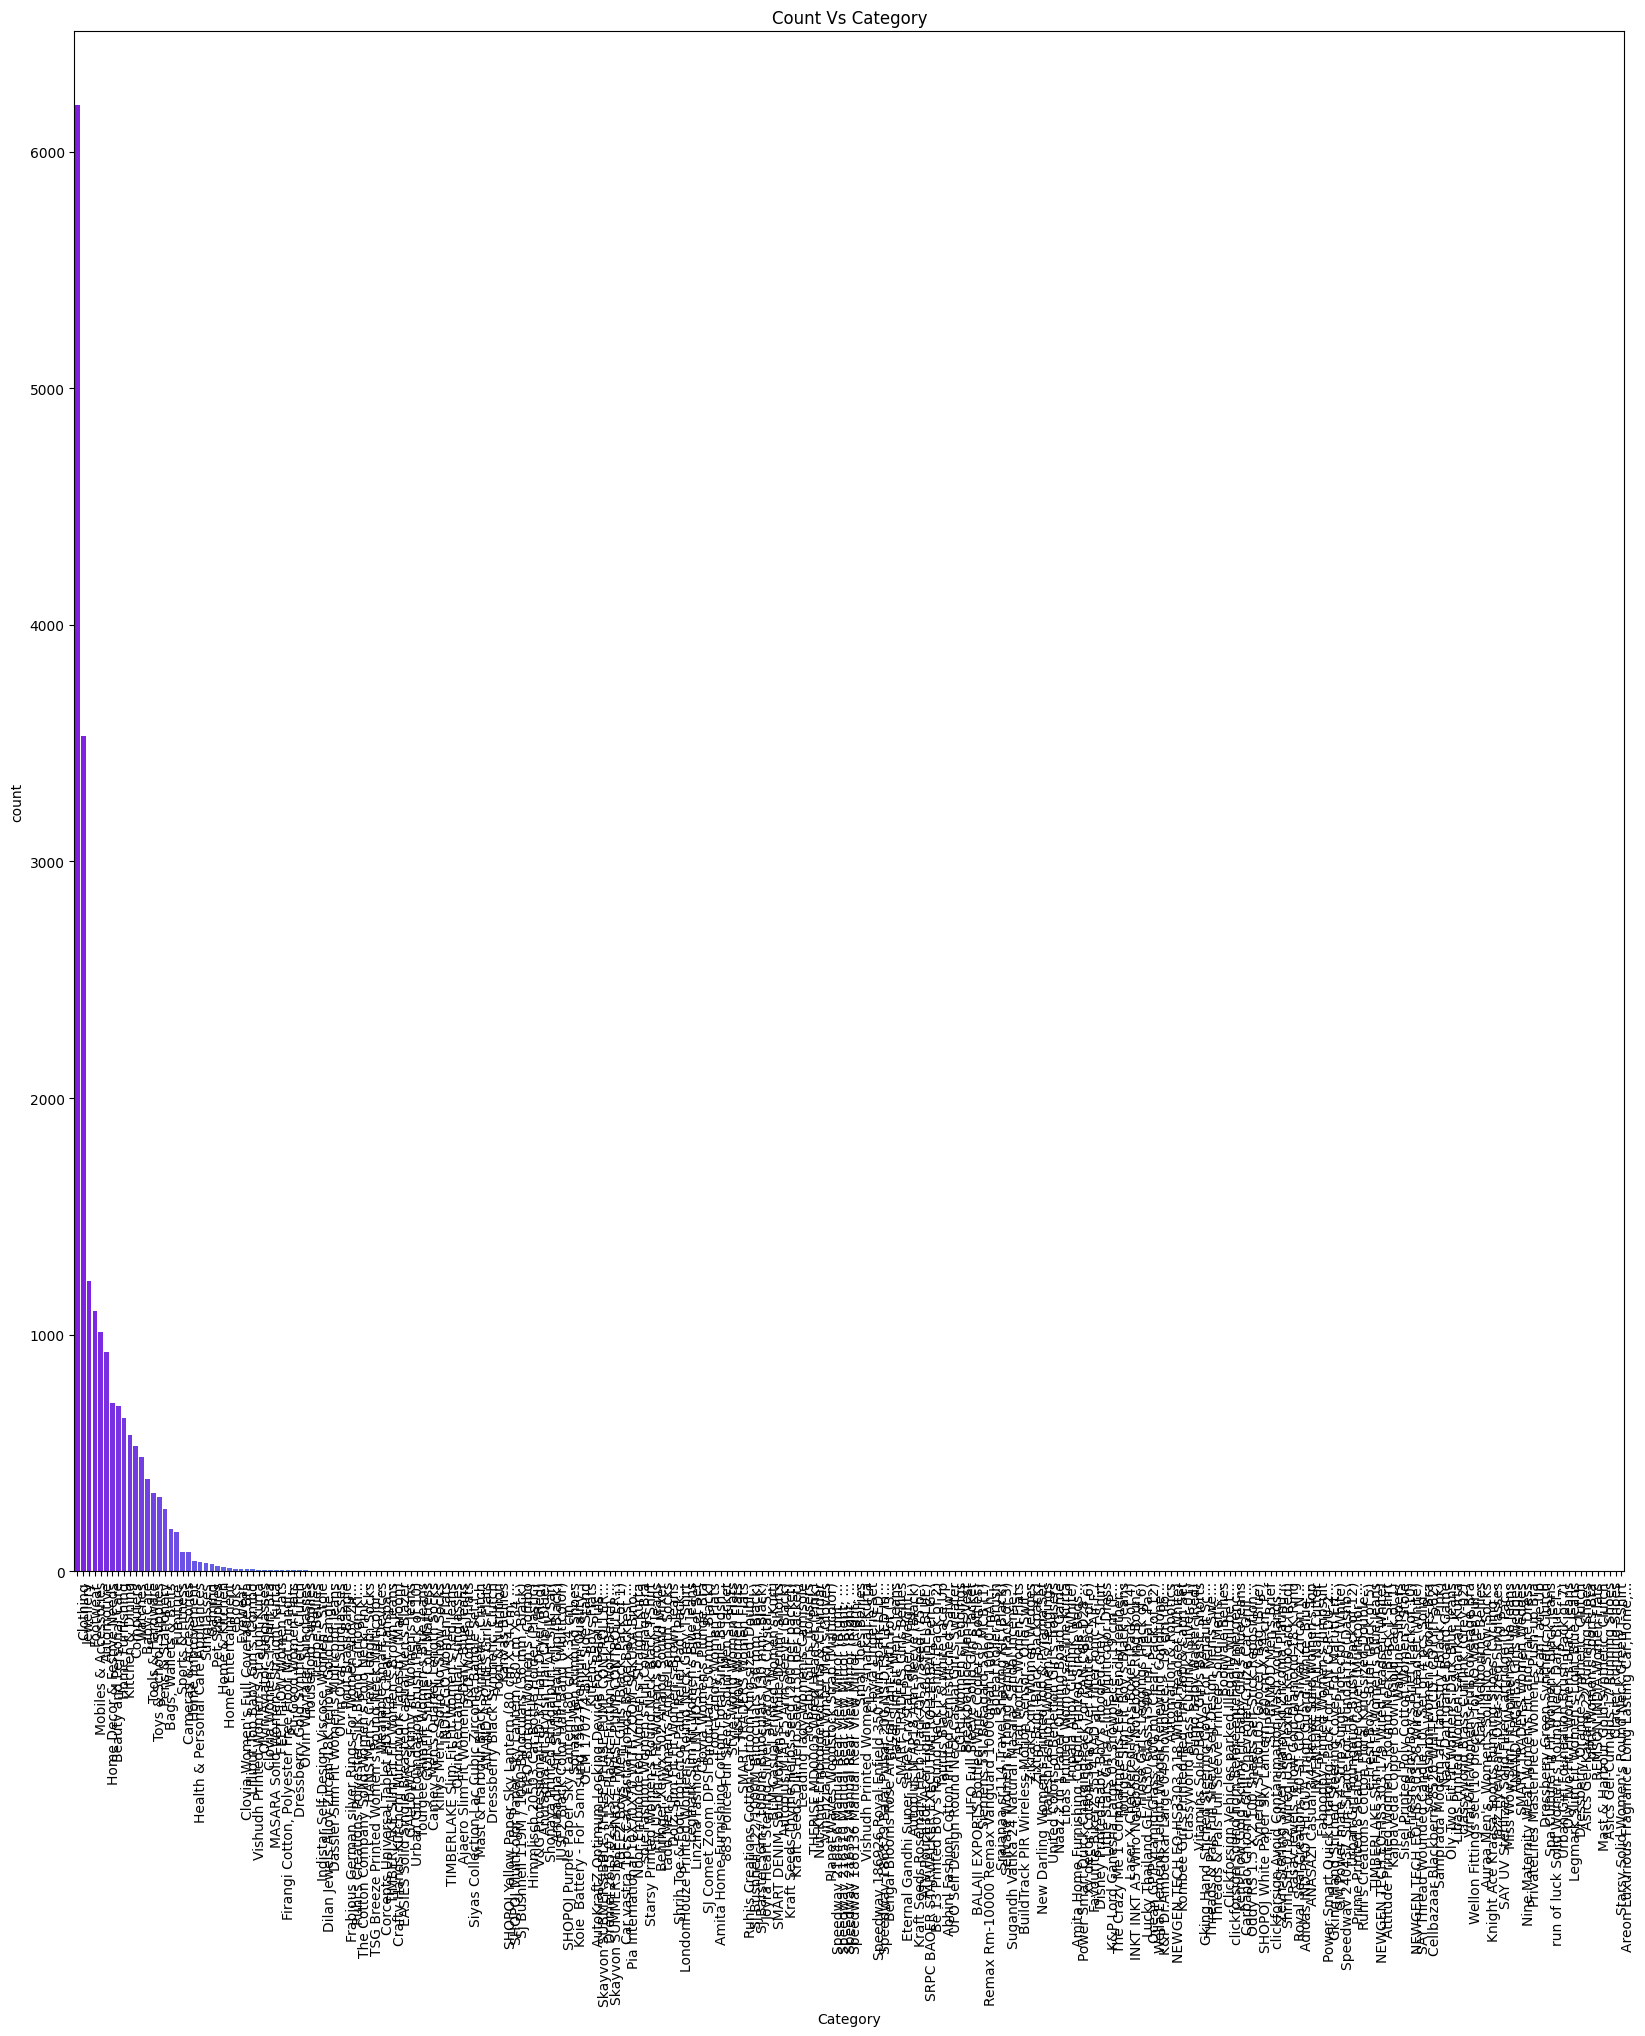

In [61]:
plt.figure(figsize=(20,20))
plt.title("Count Vs Category")
sns.countplot(x="Category",data=primary_category,palette="rainbow",
              order=primary_category["Category"].value_counts().index)
plt.xticks(rotation=90,fontsize = 10, ha='left')
plt.show()

the above graph is very messy as there are 265 categories
Let's first observe the categories with high count and ignore redundancies of categories with low count

In [62]:
# A function which returns a output containg the top categories with more then 'n' counts.


# Here, n stands for the count of categories , and bottom, if you want the categories with most/least count.
# and 'List', do we need a list or dataframe.
def count_of_category(n,bottom=False,List=False):
    output=[]
    primary_category_top=Counter(primary_category["Category"]).most_common(266)
    if bottom:
      for i in primary_category_top:
        if i[1]<=n:
            output.append(i)
    else:
      for i in primary_category_top:
        if i[1]>=n:
          output.append(i)
    if not List:
      output=pd.DataFrame(output,columns=["Category","Count"])
    return output

In [92]:
# lets try to find the categories with more then 500 counts
top_500_category = count_of_category(500)
top_500_category


,Category,Count
0,Clothing,6198
1,Jewellery,3531
2,Footwear,1227
3,Mobiles & Accessories,1099
4,Automotive,1012
5,Home Decor & Festive Needs,929
6,Beauty and Personal Care,710
7,Home Furnishing,700
8,Kitchen & Dining,647
9,Computers,578


<ipython-input-93-16cd1c8116d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Category", y="Count", data=top_500_category, kind='bar', aspect=2, palette='rainbow')


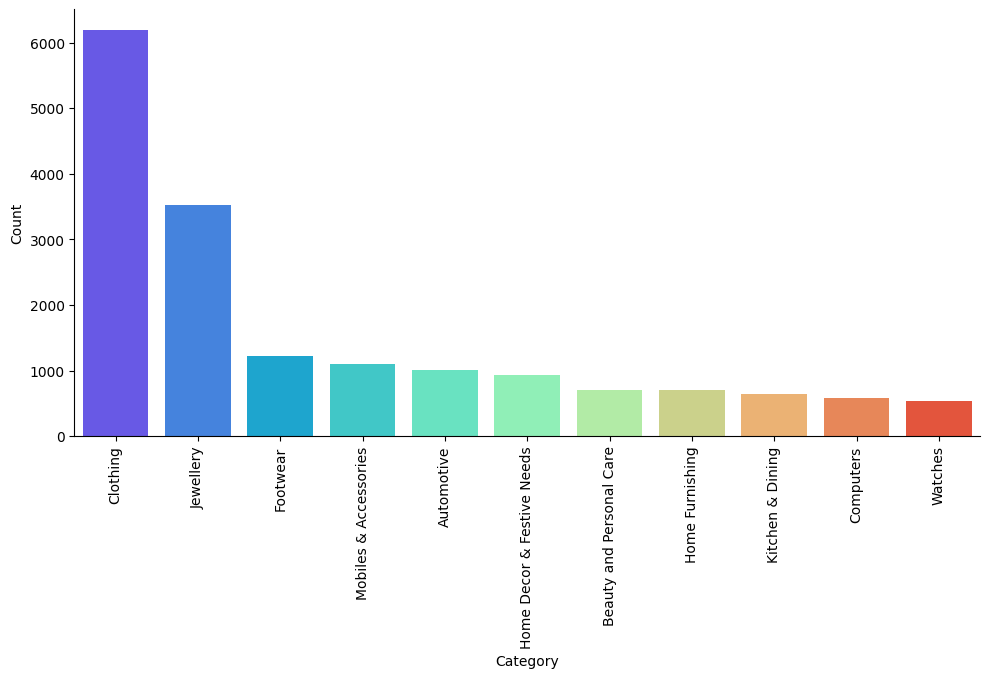

In [93]:
#let's plot this

# Assuming top_500_category is a DataFrame with 'Category' and 'Count' columns
sns.catplot(x="Category", y="Count", data=top_500_category, kind='bar', aspect=2, palette='rainbow')
plt.xticks(rotation=90)
plt.show()



the above plot shows it is very unbalanced and it will lead to biased ML model
We need to try under sampling or over sampling but these terms are very dependent on flipkart's shopping trends. Let's see this later.

### Unrequired Data

Let's look at the ineffectual data and see if we can make something useful out of it.

In [65]:
#Let's see if its even feasible to visualize the categories with least counts
bottom_categories=count_of_category(500,bottom=True,List=True)

In [66]:
print("The number of categories with count less then 500 :",len(bottom_categories))

The number of categories with count less then 500 : 254


As, we can see we still have 254 rows i.e Unique Categories, it would not be possible to visualize , let's switch to old fashion way, manually.

In [67]:
bottom_categories

[('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gold Synthetic  Clutch', 4),
 ('Pu-Good Women Flats', 4),
 ('FEET FLOW Women Flats', 4),
 ('Olvin Wayfarer Sunglasses', 4),
 ('Firangi Cotton, Polyester Free Floor Mat Firangi...', 4),
 ('Household Supplies', 4),
 ("Indistar Self Design Viscose Women's Stole", 3),
 ('Treppe Bellies', 3),
 ('F

### Manual Inspection Observation
In this Inspection, I noticed that now the categories have product name instead of actual categories (in most cases). Further, the data shows the same trend, large number of clothing and footwear items etc, meaning that even the un-required data speaks the proportion of the orignal and correct one.

Since they are unique it would not be possible to clean this data and extract the Primary and Correct category from it.

This means, only thing now left is to remove the unrequired data and move forward to the Machine Learning Part.

Making a new column for Primary Category

In [68]:
fkdata

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [69]:
#making a new column "primary_category"
fkdata["primary_category"]=primary_category
fkdata.head()

,product_name,product_category_tree,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [71]:
#Now there is no need for product_category_tree , so we drop it.
fkdata.drop(fkdata.columns[[1]], axis=1, inplace=True)

In [72]:
fkdata

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


In [75]:
#checking the remaning null values in the data.
fkdata[fkdata['description'].isnull()]

,product_name,description,brand,primary_category
553,Ozel Studio Casual Sleeveless Printed Women's Top,NaN,NaN,Clothing
17299,Amore Abstract Cushions Cover,NaN,Amore,Home Furnishing


In [76]:
fkdata = fkdata.dropna(subset=['description'])

In [77]:
fkdata

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


In [82]:
#checking the remaning null values in the data.
fkdata[fkdata.isnull().any(axis=1)]

,product_name,description,brand,primary_category
25,Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,NaN,Clothing
26,Veelys Shiny White Quad Roller Skates - Size 4...,Veelys Shiny White Quad Roller Skates - Size 4...,NaN,Sports & Fitness
27,Bulaky vanity case Jewellery Vanity Case,Buy Bulaky vanity case Jewellery Vanity Case f...,NaN,Beauty and Personal Care
28,FDT Women's Leggings,FDT Women's Leggings - Buy Parrot Green FDT Wo...,NaN,Clothing
29,Madcaps C38GR30 Men's Cargos,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,NaN,Clothing
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


### Categories to Use
When we looked at the plot createad using top_500_category , We observed that the data was inbalanced,So our Machine Learning Model will give better accuracy and result if we use categories with large data only. For starters let's only take Top 10 Categories.

In [94]:
top_500_category = top_500_category['Category'][0:10]
top_10_categories = list(top_500_category)
top_10_categories


['Clothing',
 'Jewellery',
 'Footwear',
 'Mobiles & Accessories',
 'Automotive',
 'Home Decor & Festive Needs',
 'Beauty and Personal Care',
 'Home Furnishing',
 'Kitchen & Dining',
 'Computers']

In [95]:
fkdata

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


In [98]:
#using 'isin' we filtered our flipkart data to have only top 10 categories
fkdata= fkdata[fkdata['primary_category'].isin(top_10_categories)][['product_name','description','brand','primary_category']]
fkdata


,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


### Attempt to Increase Accuracy
Now, we can merge the product_name, description and brand column to create a single feature. This is an attempt to increase the accuracy of the model, using more than just the description.

In [101]:

#let's make a copy of orginal data
fkdata_merged=fkdata.copy()
fkdata_merged

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [102]:
# Merging the columns using string property
fkdata_merged['desc']= fkdata_merged['brand'].astype(str) +" "+ fkdata_merged['product_name'].astype(str) + " " + fkdata_merged['description'].astype(str)

#created a new single feature 'desc'

In [103]:

#Dropping unrequired Columns
fkdata_merged.drop(fkdata_merged.columns[[0,1,2]], axis=1, inplace=True)

In [105]:
fkdata_merged


,primary_category,desc
0,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
2,Footwear,AW AW Bellies Key Features of AW Bellies Sanda...
3,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
6,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
8,Footwear,"dilli bazaaar dilli bazaaar Bellies, Corporate..."
...,...,...
19936,Footwear,nan Purple Women Heels Flipkart.com: Buy Purpl...
19941,Footwear,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...
19953,Footwear,nan La Isla Women Heels Flipkart.com: Buy La I...
19958,Footwear,nan We Witches Comfy Hues Women Wedges Flipkar...


In [106]:
# reindex the 'desc' column in front
fkdata_merged=fkdata_merged.reindex(['desc','primary_category'],axis="columns")
fkdata_merged

,desc,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [107]:
# Let's use only "description" column to predict the categories
fkdata.drop(fkdata.columns[[0,2]], axis=1, inplace=True)

In [108]:
fkdata

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


## Conclusion
Now, we have two data, one with features megered into single column text

flipkart_data_merged
and other

flipkart_data
with just description column, we will now check which data performs better.

(Initial assumption : flipkart_data_merged will tend to perform better as Brand and product name is essential to define its category).

** Things to keep in mind : **

flipkart_data_merged has word 'nan' due to empty brand columns. We can take care of that and other words like "Buy","Key Features" etc in stopwords.
flipkart_data on the other hand has only "description" as a feature.

## Machine Learning
Now since our data is clean and ready to be used. We can go ahead and decide the algorithm to use.

I will use Naive Bayes algorithm based on Bayes’ theorem.

Reason to use Naive Bayes.
This problem is of Multi-class classification, So we need a classifer to define categories to the product based on text/description, Naive bayes is well suited for that, It's easy to implement and works well on small data. Other Algorithm that we can try is Linear Support Vector Classifier.

In [109]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string # for removing punctuations in string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [110]:
#adding custom stopwords
# custom stopwords are selected from manual inspection
new_stopwords = ["buy", "features", "key", "specifications","nan","NaN"]

#extending the stopwords with custom stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)


In [111]:
# This class preprocesses the text for us using tokenizer and stopwords.
# it also removes punctuations if there are any.
class PreProcessText(object):
    def __init__(self):
        pass

    def __remove_punctuation(self, text):
        """
        Takes a String
        return : Return a String
        """
        message = []
        for x in text:
            #Using String Library
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)

        return message

    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            #our custom stpwrd
            if x.lower() in stpwrd:
                pass
            else:
                words.append(x)
        return words


    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to
        Train the Model
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words


In [112]:
# This class preprocesses the text for us using tokenizer and stopwords.
# it also removes punctuations if there are any.
class PreProcessText(object):
    def __init__(self):
        pass

    def __remove_punctuation(self, text):
        """
        Takes a String
        return : Return a String
        """
        message = []
        for x in text:
            #Using String Library
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)

        return message

    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            #our custom stpwrd
            if x.lower() in stpwrd:
              pass
            else:
                words.append(x)
        return words


    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to
        Train the Model
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

### Now, let's data fkdata first which has description and primary category as columns

In [113]:
obj = PreProcessText()
fkdata["description"]=fkdata["description"].apply(obj.token_words)

In [114]:
fkdata['description']

0        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
2        [AW, Bellies, Sandals, Wedges, Heel, CasualsAW...
3        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
6        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
8        [dilli, bazaaar, Bellies, Corporate, Casuals, ...
                               ...                        
19936    [Flipkartcom, Purple, Women, Heels, Rs, 899, F...
19941    [Flipkartcom, Pinq, Chiq, Women, Heels, Rs, 76...
19953    [Flipkartcom, La, Isla, Women, Heels, Rs, 779,...
19958    [Flipkartcom, Witches, Comfy, Hues, Women, Wed...
19962    [Flipkartcom, Stylistry, Women, Heels, Rs, 499...
Name: description, Length: 16629, dtype: object

### Splitting the data into Train and Test

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fkdata["description"],fkdata["primary_category"], test_size=0.40)



In [116]:
X_train

4831     [Amzer, Swiveling, Air, Vent, Mount, HTC, One,...
2314     [S4S, Stylish, Womens, Pushup, Bra, Price, Rs,...
7740     [Ravetech, 7, Mp5, Mirror, monitor, car, rear,...
12887    [Go, Hooked, Toothpick, Holder, Rs299, online,...
1198     [Candy, House, Solid, Mens, Polo, Neck, TShirt...
                               ...                        
15082    [Ramarrow, Fun, Low, Raise, Printed, Mens, Box...
4678     [Allure, Auto, sur4617, Car, Mat, Volkswagen, ...
5485     [Fabpoppy, Womens, Pyjama, yellow, CottonSpeci...
13286    [Pezzava, Printed, Womens, Wrap, Around, Skirt...
12082    [Addiction, Womens, Geometric, Print, Casual, ...
Name: description, Length: 9977, dtype: object

This is a list, but we need to send String not list to TfidfVectorizer and CountVectorizer in further code, otherwise it will break

In [117]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))


In [118]:
#check
X_test

14163    Numero Uno Solid Mens Round Neck TShirt Yellow...
11266    La Rochelle Womens Leggings Pack 2 Price Rs 39...
2783     Ladyland BOBBY Womens Full Coverage Bra Beige ...
10512    Anuradha Art ZBF263 Hair Clip ClipAnuradha Art...
3175     PI ZON Slim Fit Womens Blue Jeans Jeans Detail...
                               ...                        
18496    ZOSIGN Men Sandals Occasion Casual Material Le...
16529    Sports 52 Wear Full Sleeve Solid Mens Sweatshi...
13942    Norwood Striped Mens Polo Neck Reversible TShi...
14689    Provogue Slim Fit Mens Jeans Blue Provogue Sli...
19402    GAJ IMPEX Acrylic Bangle Set Beautiful Kundan ...
Name: description, Length: 6652, dtype: object

Now, we need to convert text data into vectors as model can process only numerical data

Two methods that we can use are

TfidfVectorizer
CountVectorizer
To decide which one is better for our data,we can simply use both and try.

In [119]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Importing the ML model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


TfidVectorizer

In [120]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training our model
model.fit(X_train,y_train)
prediction_tfid=model.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for fkdata using Tfid : ",accuracy_score(y_test,prediction_tfid))

Accuracy Score for fkdata using Tfid :  0.900631389055923


CountVectorizer

In [122]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model_2 = make_pipeline(CountVectorizer(),MultinomialNB())
#Training our model
model_2.fit(X_train,y_train)
prediction_countV = model_2.predict(X_test)

In [123]:
print("Accuracy Score for fkdata using Count : ",accuracy_score(y_test,prediction_countV))

Accuracy Score for fkdata using Count :  0.9631689717378232


In [124]:
print(classification_report(y_test,prediction_countV))

                            precision    recall  f1-score   support

                Automotive       0.94      0.99      0.96       399
  Beauty and Personal Care       0.92      0.85      0.88       280
                  Clothing       1.00      0.99      1.00      2473
                 Computers       0.93      0.75      0.83       232
                  Footwear       1.00      0.93      0.96       510
Home Decor & Festive Needs       0.93      0.98      0.95       356
           Home Furnishing       0.98      0.98      0.98       282
                 Jewellery       0.91      1.00      0.95      1417
          Kitchen & Dining       0.99      0.86      0.92       265
     Mobiles & Accessories       0.98      0.92      0.95       438

                  accuracy                           0.96      6652
                 macro avg       0.96      0.93      0.94      6652
              weighted avg       0.96      0.96      0.96      6652



### fkdata_merged

In [125]:
fkdata_merged

,desc,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [129]:
obj = PreProcessText()
fkdata_merged["desc"]=fkdata_merged["desc"].apply(obj.token_words)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fkdata_merged["desc"],fkdata_merged["primary_category"], test_size=0.40)



In [132]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))

In [133]:
X_train

1983     Purple Luxemburg Bandaeu Womens Tube Bra Luxem...
2433     Sky Blue S4S Comfortable Womens Full Coverage ...
956      AKUP AKUP urownkind Ceramic Mug AKUP urownkind...
16248    Babylon Patjane Women Wedges Flipkartcom Babyl...
5445     Services Junction Services Junction Beautiful ...
                               ...                        
5871     iSweven iSweven Stone Necklace iSweven Stone N...
13350    Enthopia Enthopia Back Cover iPad Mini iPad Mi...
2306     Pink S4S Stylish Womens Pushup Bra S4S Stylish...
3100     FS Mini Klub Casual Girls Top FS Mini Klub Cas...
13546    Enthopia Enthopia Flip Cover iPad 2 iPad 3 iPa...
Name: desc, Length: 9977, dtype: object

TfidVectorizer

In [134]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training our model
model.fit(X_train,y_train)
prediction_tfid=model.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for fkdata_merged using Tfid : ",accuracy_score(y_test,prediction_tfid)) # Expected higher result than flipkart_data


Accuracy Score for fkdata_merged using Tfid :  0.9317498496692724


CountVectorizer

In [136]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model_2 = make_pipeline(CountVectorizer(),MultinomialNB())
#Training our model
model_2.fit(X_train,y_train)
prediction_countV = model_2.predict(X_test)

In [138]:
print("Accuracy Score for fkdata_mereged using Count : ",accuracy_score(y_test,prediction_countV))
#Expects Higher result than fkdata_mereged

Accuracy Score for fkdata_mereged using Count :  0.9861695730607336


In [139]:
print(classification_report(y_test,prediction_countV))

                            precision    recall  f1-score   support

                Automotive       0.96      0.99      0.98       408
  Beauty and Personal Care       0.98      0.93      0.96       292
                  Clothing       1.00      1.00      1.00      2473
                 Computers       0.96      0.92      0.94       225
                  Footwear       1.00      0.99      0.99       465
Home Decor & Festive Needs       0.96      0.99      0.98       375
           Home Furnishing       0.99      0.99      0.99       309
                 Jewellery       0.98      1.00      0.99      1419
          Kitchen & Dining       0.98      0.91      0.94       250
     Mobiles & Accessories       0.98      0.97      0.97       436

                  accuracy                           0.99      6652
                 macro avg       0.98      0.97      0.97      6652
              weighted avg       0.99      0.99      0.99      6652



## VERDICT

As Expected, using **fKdata_merged** gave us better result than without merging the 'brand', 'product_name' and 'description'.

Best Result: Accuracy Score for fKdata_mereged using Count : 0.9865160349854227

We obtained this result using fdata_merge and CountVectorizer.

We don't need to explore other Machine learning models as Naive Bayes gave us 0.98 accuracy.